<a href="https://colab.research.google.com/github/saurabhshinkar/Play_Store_App_Review_Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing Dataset
play_store_data= pd.read_csv('/content/drive/MyDrive/Capstone Projects/EDA project/Play Store Data.csv')


In [4]:
# First Look

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
play_store_data.shape

(10841, 13)

In [7]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
play_store_data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Missing Value Count Function
def show_missing():
    missing = play_store_data.columns[play_store_data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False)/len(play_store_data)*100,2))

Missing Data Count
Rating            1474
Current Ver       8   
Android Ver       3   
Type              1   
Content Rating    1   
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Rating            13.60
Current Ver       0.07 
Android Ver       0.03 
Type              0.01 
Content Rating    0.01 
dtype: float64


In [ ]:
play_store_data[play_store_data['Rating'].isnull()]

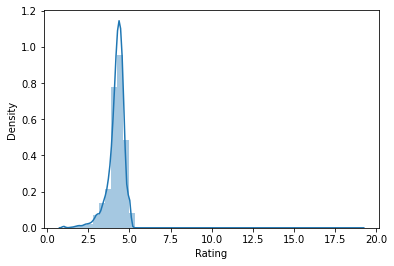

In [12]:
sns.distplot(play_store_data.Rating.dropna())

In [15]:
play_store_data['Rating'].median()

4.3

In [18]:
#Method 1: Fill NaN Values in One Column with Median

play_store_data['Rating'] = play_store_data['Rating'].fillna(play_store_data['Rating'].median())

In [20]:
# Missing Value Count Function
def show_missing():
    missing = play_store_data.columns[play_store_data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False)/len(play_store_data)*100,2))

Missing Data Count
Current Ver       8
Android Ver       3
Type              1
Content Rating    1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Current Ver       0.07
Android Ver       0.03
Type              0.01
Content Rating    0.01
dtype: float64


In [21]:
play_store_data.dropna(inplace=True)

In [22]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [27]:
play_store_data['Installs'].dtype

dtype('O')

In [29]:
type(play_store_data.Installs.iloc[0][0])

str

In [35]:
play_store_data['Installs'].value_counts()

1,000,000+        1578
10,000,000+       1252
100,000+          1169
10,000+           1052
1,000+            905 
5,000,000+        752 
100+              718 
500,000+          538 
50,000+           478 
5,000+            476 
100,000,000+      409 
10+               385 
500+              330 
50,000,000+       289 
50+               205 
5+                82  
500,000,000+      72  
1+                67  
1,000,000,000+    58  
0+                14  
Name: Installs, dtype: int64

In [36]:
df=play_store_data.copy()

In [40]:
df['Installs']=df['Installs'].apply(lambda x:x.replace('+',''))
df['Installs']=df['Installs'].apply(lambda x:x.replace(',',''))
df['Installs']=pd.to_numeric(df['Installs'])

In [41]:
df['Installs'].value_counts()

1000000       1578
10000000      1252
100000        1169
10000         1052
1000          905 
5000000       752 
100           718 
500000        538 
50000         478 
5000          476 
100000000     409 
10            385 
500           330 
50000000      289 
50            205 
5             82  
500000000     72  
1             67  
1000000000    58  
0             14  
Name: Installs, dtype: int64

In [ ]:
df.head()

In [47]:
df['Installs'].dtype

dtype('int64')

In [50]:
df['Price'].value_counts().head()

0        10032
$0.99    146  
$2.99    129  
$1.99    73   
$4.99    72   
Name: Price, dtype: int64

In [59]:
type(play_store_data.Price.iloc[0])

str

In [52]:
df['Price']=df['Price'].apply(lambda x:x.replace('$',''))
df['Price']=pd.to_numeric(df['Price'])

In [57]:
type(df.Price.iloc[0])

numpy.float64